In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams.update({'font.size': 8, 'font.family': 'sans'})

data = pd.read_csv('diabetes.tab.csv')
print(data.head(20))

    AGE  SEX   BMI     BP   S1     S2    S3    S4      S5  S6    Y
0    59    2  32.1  101.0  157   93.2  38.0  4.00  4.8598  87  151
1    48    1  21.6   87.0  183  103.2  70.0  3.00  3.8918  69   75
2    72    2  30.5   93.0  156   93.6  41.0  4.00  4.6728  85  141
3    24    1  25.3   84.0  198  131.4  40.0  5.00  4.8903  89  206
4    50    1  23.0  101.0  192  125.4  52.0  4.00  4.2905  80  135
5    23    1  22.6   89.0  139   64.8  61.0  2.00  4.1897  68   97
6    36    2  22.0   90.0  160   99.6  50.0  3.00  3.9512  82  138
7    66    2  26.2  114.0  255  185.0  56.0  4.55  4.2485  92   63
8    60    2  32.1   83.0  179  119.4  42.0  4.00  4.4773  94  110
9    29    1  30.0   85.0  180   93.4  43.0  4.00  5.3845  88  310
10   22    1  18.6   97.0  114   57.6  46.0  2.00  3.9512  83  101
11   56    2  28.0   85.0  184  144.8  32.0  6.00  3.5835  77   69
12   53    1  23.7   92.0  186  109.2  62.0  3.00  4.3041  81  179
13   50    2  26.2   97.0  186  105.4  49.0  4.00  5.0626  88 

HISTOGRAM PLOT

C:\Users\Alfred\AppData\Local\Temp\ipykernel_9688\1188943064.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data, x='BMI', binwidth=2, stat='count', element='bars', palette='coolwarm', ax=ax[0,0])


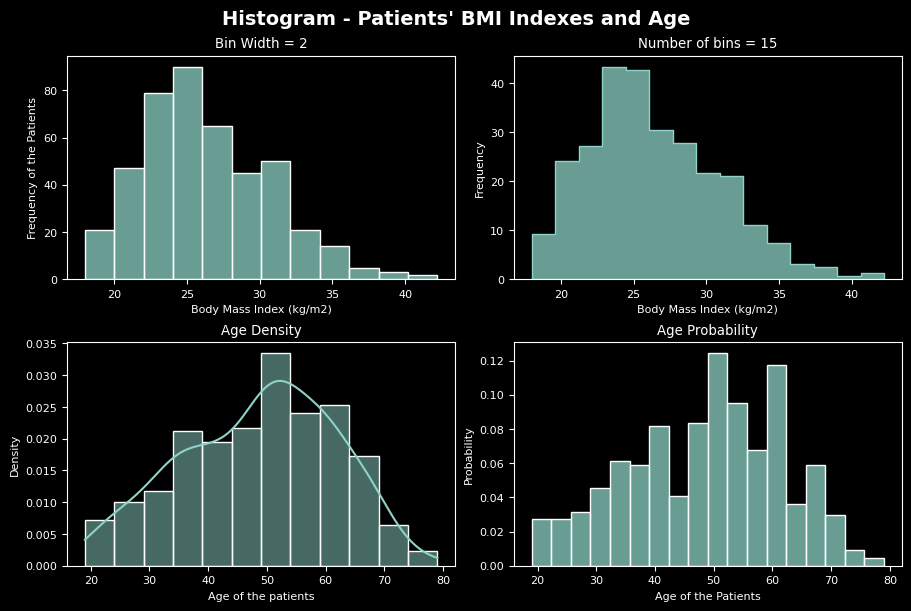

In [4]:
# Mempersiapkan empat tempat kosong untuk diagram 
# Tempat setiap diagram diberi nama ax[0,0]; ax[0,1]; ax[1,0]; ax[1,1]
# Sumbu Y setiap baris akan menggunakan aturan yg sama melalui sharey=True

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, 
                       constrained_layout = True)  # dapat disingkat menjadi plt.subplots(2,2)
fig.set_figheight(6)
fig.set_figwidth(9)
# menampilkan histogram utk BMI dengan lebar bin = 2, jumlah bins akan disesuaikan 
sns.histplot(data, x='BMI', binwidth=2, stat='count', element='bars', palette='coolwarm', ax=ax[0,0])
ax[0,0].set_title('Bin Width = 2')
ax[0,0].set_xlabel('Body Mass Index (kg/m2)')
ax[0,0].set_ylabel('Number of Patients')

# menampilkan histogram utk BMI dengan jumlah bin = 15, lebar bin akan disesuaikan
sns.histplot(data, x='BMI', bins=15, stat='frequency', element='step', ax=ax[0,1])
ax[0,1].set_title('Number of bins = 15')
ax[0,1].set_xlabel('Body Mass Index (kg/m2)')
ax[0,0].set_ylabel('Frequency of the Patients')

# menampilkan histogram utk AGE, garis KDE ditampilkan
sns.histplot(data, x='AGE', stat='density', kde=True, ax=ax[1,0])
ax[1,0].set_title('Age Density')
ax[1,0].set_xlabel('Age of the patients')
ax[1,0].set_ylabel('Density')

# menampilkan histogram utk AGE dengan jumlah bin = 18, lebar bin akan disesuaikan
sns.histplot(data, x='AGE', bins=18, stat='probability', ax=ax[1,1])
ax[1,1].set_title('Age Probability')
ax[1,1].set_xlabel('Age of the Patients')
ax[1,1].set_ylabel('Probability')

plt.suptitle('Histogram - Patients\' BMI Indexes and Age', fontsize=14, fontweight='bold')
plt.show()

DENSITY PLOT

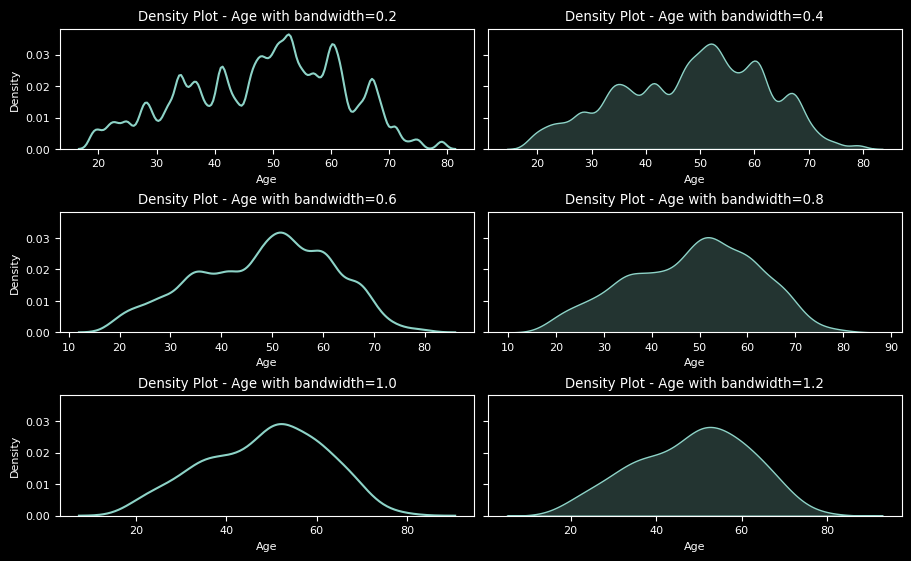

In [5]:
# ----------------------------------------
# DENSITY PLOT
# ----------------------------------------

# Dibuat subplot baru dengan sumbu Y dishare (memiliki setting yang sama)
fig, ax = plt.subplots(3, 2, sharey=True, constrained_layout = True)
fig.set_figheight(5.5)
fig.set_figwidth(9)

for i in range(0,3):
    for j in range (0,2):
        bw = round(0.2 + (i*0.4) + (j*0.2), 1)
        if (j%2 != 0): fill=True 
        else: fill=False
        sns.kdeplot(data, x='AGE', bw_adjust=bw, fill=fill, ax=ax[i,j])
        ax[i,j].set_title('Density Plot - Age with bandwidth=' + f'{bw}')
        ax[i,j].set_xlabel('Age')
plt.show()

Scatter Plot

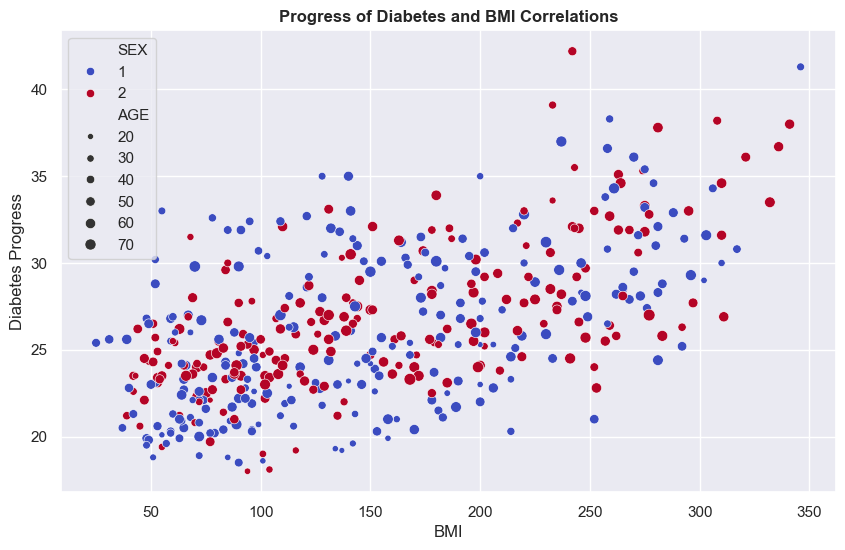

In [9]:
# ----------------------------------------
# SCATTER PLOT
# ----------------------------------------

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data, x='Y', y='BMI',size='AGE', hue='SEX', palette='coolwarm')  # Cari palette lain yang disediakan oleh matplotlib 
plt.title('Progress of Diabetes and BMI Correlations', fontweight='bold')
plt.ylabel('Diabetes Progress')
plt.xlabel('BMI')
plt.show()

ECDF PLOT

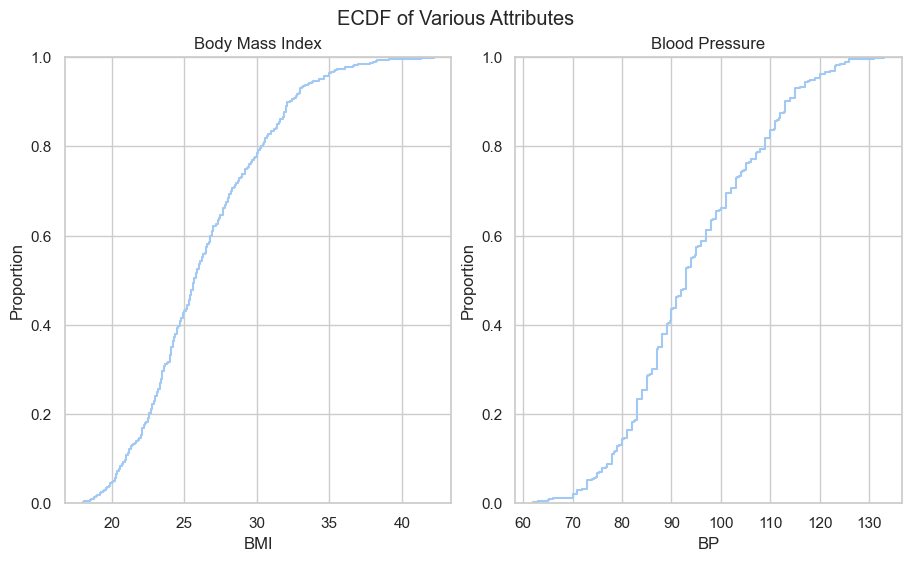

In [7]:
# ----------------------------------------
# ECDF PLOT
# ----------------------------------------

sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(1, 2, constrained_layout = True)
fig.set_figheight(5.5)
fig.set_figwidth(9)

sns.ecdfplot(data, x='BMI', ax=ax[0])
ax[0].set_title('Body Mass Index')
sns.ecdfplot(data, x='BP', ax=ax[1])
ax[1].set_title('Blood Pressure')

plt.suptitle('ECDF of Various Attributes')
plt.show()